## Description

**The Human Activity Recognition database was built from the recordings of 30 study participants performing activities of daily living (ADL) while carrying a waist-mounted smartphone with embedded inertial sensors. The objective is to classify activities into one of the six activities performed.**



# Description of experiment
The experiments have been carried out with a group of 30 volunteers within an age bracket of 19-48 years. Each person performed six activities (WALKING, WALKINGUPSTAIRS, WALKINGDOWNSTAIRS, SITTING, STANDING, LAYING) wearing a smartphone (Samsung Galaxy S II) on the waist. Using its embedded accelerometer and gyroscope, we captured 3-axial linear acceleration and 3-axial angular velocity at a constant rate of 50Hz. The experiments have been video-recorded to label the data manually. The obtained dataset has been randomly partitioned into two sets, where 70% of the volunteers was selected for generating the training data and 30% the test data. 

The sensor signals (accelerometer and gyroscope) were pre-processed by applying noise filters and then sampled in fixed-width sliding windows of 2.56 sec and 50% overlap (128 readings/window). The sensor acceleration signal, which has gravitational and body motion components, was separated using a Butterworth low-pass filter into body acceleration and gravity. The gravitational force is assumed to have only low frequency components, therefore a filter with 0.3 Hz cutoff frequency was used. From each window, a vector of features was obtained by calculating variables from the time and frequency domain.



### 1. Importing necessary libraries

In [57]:
import numpy as np 
import pandas as pd 

import matplotlib.pyplot as plt
import seaborn as sns

### 2. Loading data

In [58]:
train = pd.read_csv("train.csv")
test = pd.read_csv("test.csv")

In [59]:
train.head()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject,Activity
0,0.288585,-0.020294,-0.132905,-0.995279,-0.983111,-0.913526,-0.995112,-0.983185,-0.923527,-0.934724,...,-0.710304,-0.112754,0.030400,-0.464761,-0.018446,-0.841247,0.179941,-0.058627,1,STANDING
1,0.278419,-0.016411,-0.123520,-0.998245,-0.975300,-0.960322,-0.998807,-0.974914,-0.957686,-0.943068,...,-0.861499,0.053477,-0.007435,-0.732626,0.703511,-0.844788,0.180289,-0.054317,1,STANDING
2,0.279653,-0.019467,-0.113462,-0.995380,-0.967187,-0.978944,-0.996520,-0.963668,-0.977469,-0.938692,...,-0.760104,-0.118559,0.177899,0.100699,0.808529,-0.848933,0.180637,-0.049118,1,STANDING
3,0.279174,-0.026201,-0.123283,-0.996091,-0.983403,-0.990675,-0.997099,-0.982750,-0.989302,-0.938692,...,-0.482845,-0.036788,-0.012892,0.640011,-0.485366,-0.848649,0.181935,-0.047663,1,STANDING
4,0.276629,-0.016570,-0.115362,-0.998139,-0.980817,-0.990482,-0.998321,-0.979672,-0.990441,-0.942469,...,-0.699205,0.123320,0.122542,0.693578,-0.615971,-0.847865,0.185151,-0.043892,1,STANDING


In [60]:
train.shape

(999, 563)

In [61]:
train.size

562437

In [62]:
train.keys()

Index(['tBodyAcc-mean()-X', 'tBodyAcc-mean()-Y', 'tBodyAcc-mean()-Z',
       'tBodyAcc-std()-X', 'tBodyAcc-std()-Y', 'tBodyAcc-std()-Z',
       'tBodyAcc-mad()-X', 'tBodyAcc-mad()-Y', 'tBodyAcc-mad()-Z',
       'tBodyAcc-max()-X',
       ...
       'fBodyBodyGyroJerkMag-kurtosis()', 'angle(tBodyAccMean,gravity)',
       'angle(tBodyAccJerkMean),gravityMean)',
       'angle(tBodyGyroMean,gravityMean)',
       'angle(tBodyGyroJerkMean,gravityMean)', 'angle(X,gravityMean)',
       'angle(Y,gravityMean)', 'angle(Z,gravityMean)', 'subject', 'Activity'],
      dtype='object', length=563)

In [63]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 999 entries, 0 to 998
Columns: 563 entries, tBodyAcc-mean()-X to Activity
dtypes: float64(561), int64(1), object(1)
memory usage: 4.3+ MB


In [64]:
train.count

<bound method DataFrame.count of      tBodyAcc-mean()-X  tBodyAcc-mean()-Y  tBodyAcc-mean()-Z  \
0             0.288585          -0.020294          -0.132905   
1             0.278419          -0.016411          -0.123520   
2             0.279653          -0.019467          -0.113462   
3             0.279174          -0.026201          -0.123283   
4             0.276629          -0.016570          -0.115362   
..                 ...                ...                ...   
994           0.279222          -0.005795          -0.092436   
995           0.276892          -0.018711          -0.109727   
996           0.278116          -0.019845          -0.110447   
997           0.274745          -0.013983          -0.096445   
998           0.276491          -0.016939          -0.110932   

     tBodyAcc-std()-X  tBodyAcc-std()-Y  tBodyAcc-std()-Z  tBodyAcc-mad()-X  \
0           -0.995279         -0.983111         -0.913526         -0.995112   
1           -0.998245         -0.975300 

In [65]:
train.describe()

,tBodyAcc-mean()-X,tBodyAcc-mean()-Y,tBodyAcc-mean()-Z,tBodyAcc-std()-X,tBodyAcc-std()-Y,tBodyAcc-std()-Z,tBodyAcc-mad()-X,tBodyAcc-mad()-Y,tBodyAcc-mad()-Z,tBodyAcc-max()-X,...,fBodyBodyGyroJerkMag-skewness(),fBodyBodyGyroJerkMag-kurtosis(),"angle(tBodyAccMean,gravity)","angle(tBodyAccJerkMean),gravityMean)","angle(tBodyGyroMean,gravityMean)","angle(tBodyGyroJerkMean,gravityMean)","angle(X,gravityMean)","angle(Y,gravityMean)","angle(Z,gravityMean)",subject
count,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,...,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000,999.000000
mean,0.272522,-0.017315,-0.106699,-0.564767,-0.421911,-0.601705,-0.596136,-0.439798,-0.591796,-0.411679,...,-0.219581,-0.541213,0.015125,0.002728,0.004282,-0.013146,-0.545935,0.058899,-0.033470,2.936937
std,0.070183,0.041918,0.056029,0.428018,0.501715,0.340713,0.400180,0.486153,0.351317,0.530312,...,0.351241,0.360838,0.349059,0.469766,0.629273,0.481251,0.471809,0.349956,0.168279,1.636577
min,-0.361205,-0.684097,-1.000000,-0.999300,-0.998359,-0.999454,-0.999407,-0.998077,-0.999808,-0.971348,...,-0.944282,-0.999595,-0.939598,-0.976454,-0.995222,-0.994877,-1.000000,-0.875487,-0.980143,1.000000
25%,0.258468,-0.025925,-0.122726,-0.990822,-0.968894,-0.973927,-0.992207,-0.970928,-0.972885,-0.933391,...,-0.476273,-0.815733,-0.144342,-0.316220,-0.512150,-0.392773,-0.795959,0.030145,-0.103119,1.000000
50%,0.277054,-0.017185,-0.108829,-0.464909,-0.208523,-0.486962,-0.509215,-0.242165,-0.465163,-0.297181,...,-0.264434,-0.629299,0.010903,0.017954,0.012891,-0.016025,-0.717300,0.223164,0.030593,3.000000
75%,0.290635,-0.007523,-0.093717,-0.234604,0.045610,-0.314822,-0.289766,0.012828,-0.302503,-0.008596,...,-0.015262,-0.361251,0.178357,0.332586,0.538985,0.350713,-0.606748,0.281283,0.082679,5.000000
max,0.498177,0.324130,0.346658,0.543347,0.532506,0.364114,0.495926,0.502260,0.554965,0.680338,...,0.989538,0.956845,0.955207,0.998425,0.994519,0.971511,0.799174,0.385117,0.265795,6.000000


In [66]:
train.subject.value_counts()

1    347
3    341
5    302
6      9
Name: subject, dtype: int64

### 3. Data preprocessing

#### 3.a Checking for duplicates 

In [67]:
print('Number of duplicates in train : ',sum(train.duplicated()))
print('Number of duplicates in test : ', sum(test.duplicated()))

Number of duplicates in train :  0
Number of duplicates in test :  0


#### 3.b Checking for missing values

In [68]:
print('Total number of missing values in train : ', train.isna().values.sum())
print('Total number of missing values in train : ', test.isna().values.sum())

Total number of missing values in train :  0
Total number of missing values in train :  0


#### 3.c Checking for class imbalance

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'WALKING'),
  Text(1, 0, 'STANDING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING_UPSTAIRS'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'SITTING')])

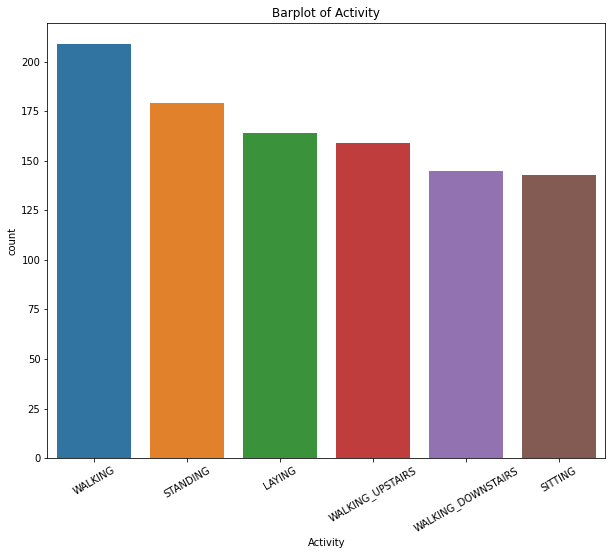

In [69]:
plt.figure(figsize=(10,8))
plt.title('Barplot of Activity')
sns.countplot(train.Activity, order = train.Activity.value_counts().index)
plt.xticks(rotation=30)

There is almost same number of observations across all the six activities so this data does not have class imbalance problem. 

### 4. Exploratory Data Analysis


#### 4.a Which Features are there?

In [70]:
from collections import Counter
pd.DataFrame.from_dict(Counter([col.split('-')[0].split('(')[0] for col in train.columns]),orient='index').rename(columns={0:'count'}).sort_values('count', ascending=False)

,count
fBodyAcc,79
fBodyGyro,79
fBodyAccJerk,79
tGravityAcc,40
tBodyAcc,40
tBodyGyroJerk,40
tBodyGyro,40
tBodyAccJerk,40
tBodyAccMag,13
tGravityAccMag,13


Mainly there are 'acceleration' and 'gyroscope' features. A few 'gravity' features are there as well. Impressive how many features there are in regard of the limited number of sensors used.

Based on the common nature of activities we can broadly put them in two categories.
- **Static and dynamic activities : **
    - SITTING, STANDING, LAYING can be considered as static activities with no motion involved
    - WALKING, WALKING_DOWNSTAIRS, WALKING_UPSTAIRS can be considered as dynamic activities with significant amount of motion involved    
    
Let's consider **tBodyAccMag-mean()** feature to differentiate among these two broader set of activities.

If we try to build a simple classification model to classify the **activity** using one variable at a time then probability density function(PDF) is very helpful to assess importance of a continuous variable.

#### 4.a Analysing tBodyAccMag-mean feature

Text(0.1, 9, 'Dynamic Activities')

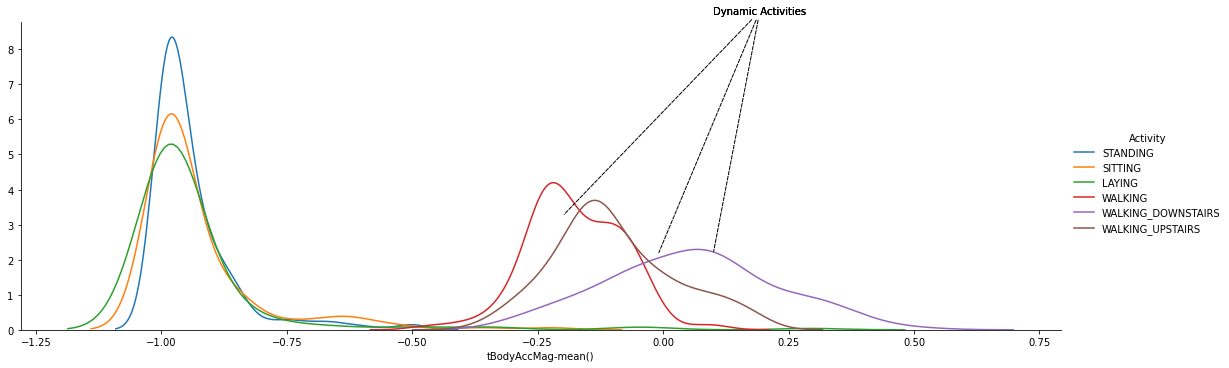

In [71]:
facetgrid = sns.FacetGrid(train, hue='Activity', height=5,aspect=3)
facetgrid.map(sns.distplot,'tBodyAccMag-mean()', hist=False).add_legend()
plt.annotate("Static Activities", xy=(-.996,21), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-.999,26), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Static Activities", xy=(-0.985,12), xytext=(-0.9, 23),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.2,3.25), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(0.1,2.18), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})
plt.annotate("Dynamic Activities", xy=(-0.01,2.15), xytext=(0.1, 9),arrowprops={'arrowstyle': '-', 'ls': 'dashed'})

Using the above density plot we can easily come with a condition to seperate static activities from dynamic activities.

``` 
if(tBodyAccMag-mean()<=-0.5):
    Activity = "static"
else:
    Activity = "dynamic"
```

Let's have a more closer view on the PDFs of each activity under static and dynamic categorization.

<AxesSubplot:title={'center':'Dynamic Activities(closer view)'}, xlabel='tBodyAccMag-mean()', ylabel='Density'>

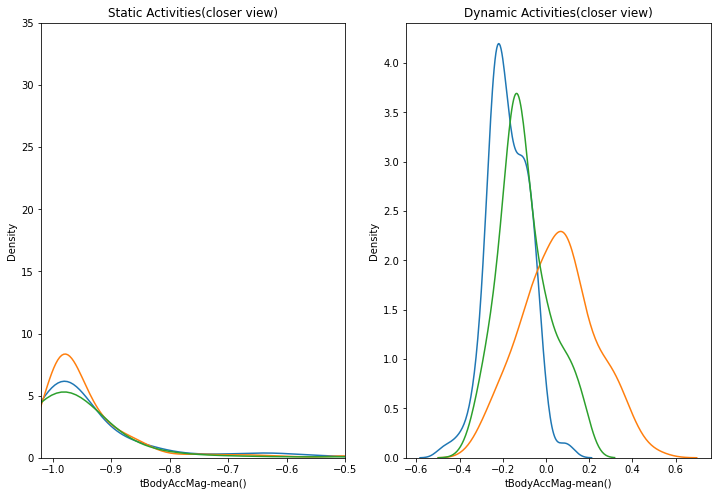

In [72]:
plt.figure(figsize=(12,8))
plt.subplot(1,2,1)
plt.title("Static Activities(closer view)")
sns.distplot(train[train["Activity"]=="SITTING"]['tBodyAccMag-mean()'],hist = False, label = 'Sitting')
sns.distplot(train[train["Activity"]=="STANDING"]['tBodyAccMag-mean()'],hist = False,label = 'Standing')
sns.distplot(train[train["Activity"]=="LAYING"]['tBodyAccMag-mean()'],hist = False, label = 'Laying')
plt.axis([-1.02, -0.5, 0, 35])
plt.subplot(1,2,2)
plt.title("Dynamic Activities(closer view)")
sns.distplot(train[train["Activity"]=="WALKING"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING')
sns.distplot(train[train["Activity"]=="WALKING_DOWNSTAIRS"]['tBodyAccMag-mean()'],hist = False,label = 'WALKING_DOWNSTAIRS')
sns.distplot(train[train["Activity"]=="WALKING_UPSTAIRS"]['tBodyAccMag-mean()'],hist = False, label = 'WALKING_UPSTAIRS')

The insights obtained through density plots can also be represented using Box plots.
Let's plot the boxplot of Body Accelartion Magnitude mean(tBodyAccMag-mean()) across all the six categories.

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

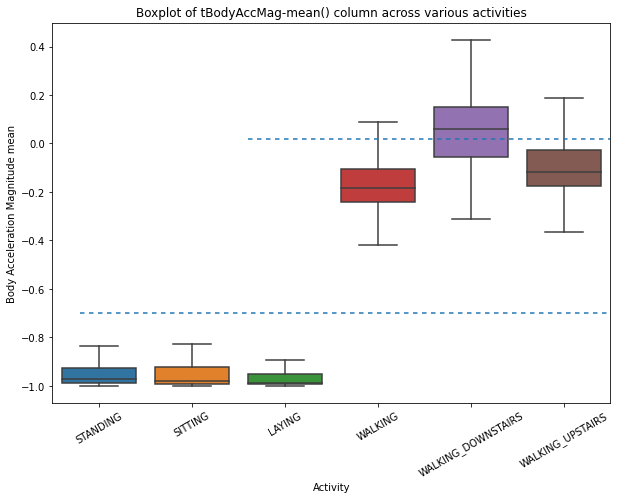

In [73]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='tBodyAccMag-mean()',data=train, showfliers=False)
plt.ylabel('Body Acceleration Magnitude mean')
plt.title("Boxplot of tBodyAccMag-mean() column across various activities")
plt.axhline(y=-0.7, xmin=0.05,dashes=(3,3))
plt.axhline(y=0.020, xmin=0.35, dashes=(3,3))
plt.xticks(rotation=30)

Using boxplot again we can come with conditions to seperate static activities from dynamic activities.

``` 
if(tBodyAccMag-mean()<=-0.8):
    Activity = "static"
if(tBodyAccMag-mean()>=-0.6):
    Activity = "dynamic"
``` 

Also, we can easily seperate WALKING_DOWNSTAIRS activity from others using boxplot.

``` 
if(tBodyAccMag-mean()>0.02):
    Activity = "WALKING_DOWNSTAIRS"
else:
    Activity = "others"
```

But still 25% of WALKING_DOWNSTAIRS observations are below 0.02 which are misclassified as **others** so this condition makes an error of 25% in classification.

#### 4.b Analysing Angle between X-axis and gravityMean feature

(array([0, 1, 2, 3, 4, 5]),
 [Text(0, 0, 'STANDING'),
  Text(1, 0, 'SITTING'),
  Text(2, 0, 'LAYING'),
  Text(3, 0, 'WALKING'),
  Text(4, 0, 'WALKING_DOWNSTAIRS'),
  Text(5, 0, 'WALKING_UPSTAIRS')])

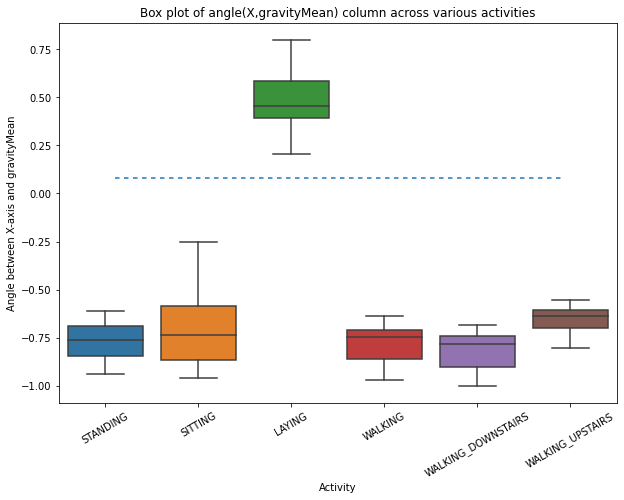

In [74]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(X,gravityMean)', data=train, showfliers=False)
plt.axhline(y=0.08, xmin=0.1, xmax=0.9,dashes=(3,3))
plt.ylabel("Angle between X-axis and gravityMean")
plt.title('Box plot of angle(X,gravityMean) column across various activities')
plt.xticks(rotation = 30)

From the boxplot we can observe that angle(X,gravityMean) perfectly seperates LAYING from other activities.
``` 
if(angle(X,gravityMean)>0.01):
    Activity = "LAYING"
else:
    Activity = "others"
```

#### 4.c Analysing Angle between Y-axis and gravityMean feature

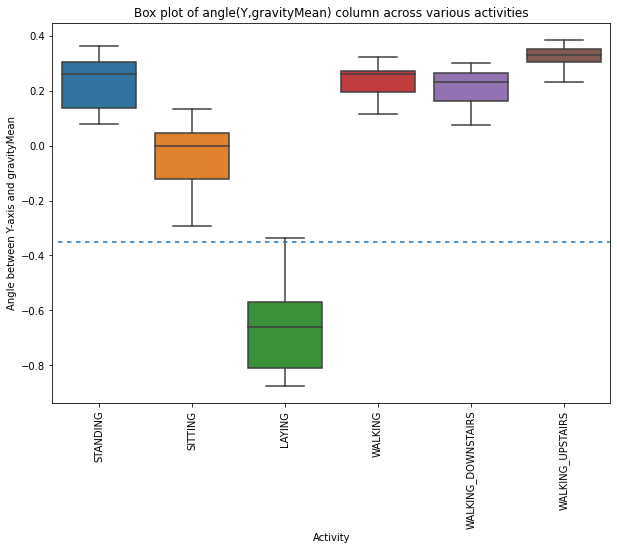

In [75]:
plt.figure(figsize=(10,7))
sns.boxplot(x='Activity', y='angle(Y,gravityMean)', data = train, showfliers=False)
plt.ylabel("Angle between Y-axis and gravityMean")
plt.title('Box plot of angle(Y,gravityMean) column across various activities')
plt.xticks(rotation = 90)
plt.axhline(y=-0.35, xmin=0.01, dashes=(3,3))

Similarly, using Angle between Y-axis and gravityMean we can seperate LAYING from other activities but again it leads to some misclassification error.  

### 4.d Visualizing data using PCA

Using PCA data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information.
Given training data has 561 unqiue features, using PCA let's visualize it to a 2D space.

In [76]:
from sklearn.decomposition import PCA

In [77]:
X_for_pca = train.drop(['subject', 'Activity'], axis=1)

In [78]:
pca = PCA(random_state = 42, n_components=2).fit_transform(X_for_pca)

In [79]:
pca

array([[-6.36901119,  0.61741017],
       [-6.38992164,  0.34230778],
       [-6.29411169,  0.03949979],
       ...,
       [-5.60565164,  0.97553969],
       [-5.71446877,  0.74044733],
       [-6.02377012,  0.71727617]])

<AxesSubplot:>

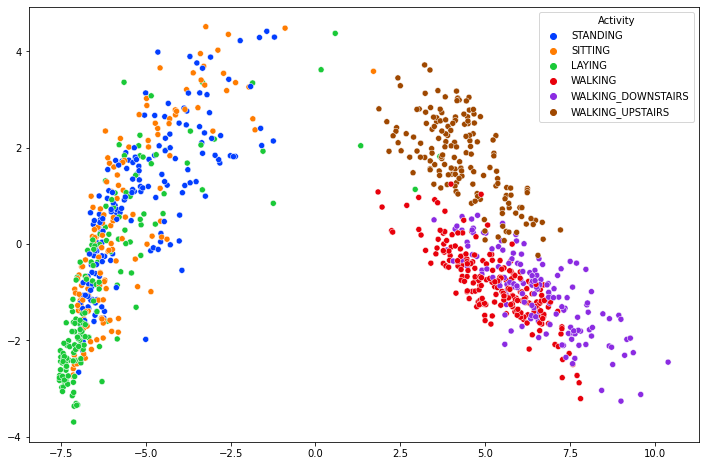

In [80]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =pca[:, 0], y = pca[:, 1], hue = train["Activity"],palette="bright")

Using the two new components obtained through PCA we can visualize and seperate all the six activities in a 2D space.

### 4.d Visualizing data using t-SNE

Using t-SNE data can be visualized from a extremely high dimensional space to a low dimensional space and still it retains lots of actual information. Given training data has 561 unqiue features, using t-SNE let's visualize it to a 2D space.

In [81]:
from sklearn.manifold import TSNE

In [82]:
X_for_tsne = train.drop(['subject', 'Activity'], axis=1)

In [83]:
tsne = TSNE(random_state = 42, n_components=2, n_iter=1000).fit_transform(X_for_tsne)

In [84]:
tsne

array([[-37.065716 ,  -1.0398414],
       [-37.305058 ,  10.401303 ],
       [-36.20763  ,   5.2912283],
       ...,
       [-33.1018   ,   5.6946225],
       [-34.19583  ,   8.864777 ],
       [-34.33171  ,   9.180101 ]], dtype=float32)

Using the two new components obtained through t-SNE we can visualize and seperate all the six activities in a 2D space. 

<AxesSubplot:>

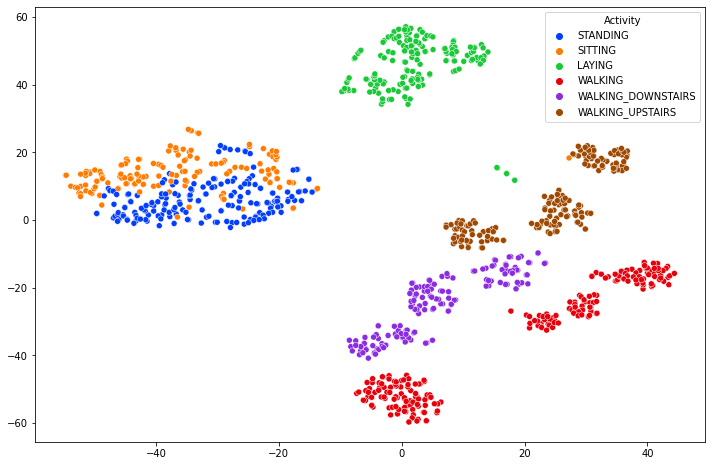

In [85]:
plt.figure(figsize=(12,8))
sns.scatterplot(x =tsne[:, 0], y = tsne[:, 1], hue = train["Activity"],palette="bright")

### 5. ML models

#### Getting training and test data ready

In [86]:
y_train = train.Activity
X_train = train.drop(['subject', 'Activity'], axis=1)
y_test = test.Activity
X_test = test.drop(['subject', 'Activity'], axis=1)
print('Training data size : ', X_train.shape)
print('Test data size : ', X_test.shape)

Training data size :  (999, 561)
Test data size :  (999, 561)


### 5.a Logistic regression model with Hyperparameter tuning and cross validation

In [87]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import RandomizedSearchCV
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report

import warnings
warnings.filterwarnings("ignore")

In [88]:
parameters = {'max_iter':[100, 200, 500]}
lr_classifier = LogisticRegression()
lr_classifier_rs = RandomizedSearchCV(lr_classifier, param_distributions=parameters, cv=5,random_state = 42)
lr_classifier_rs.fit(X_train, y_train)
y_pred = lr_classifier_rs.predict(X_test)

In [89]:
lr_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Logistic Regression : ", lr_accuracy)

Accuracy using Logistic Regression :  0.8848848848848849


In [90]:
# function to plot confusion matrix
def plot_confusion_matrix(cm,labels):
    fig, ax = plt.subplots(figsize=(12,8)) # for plotting confusion matrix as image
    im = ax.imshow(cm, interpolation='nearest', cmap=plt.cm.Blues)
    ax.figure.colorbar(im, ax=ax)
    ax.set(xticks=np.arange(cm.shape[1]),
    yticks=np.arange(cm.shape[0]),
    xticklabels=labels, yticklabels=labels,
    ylabel='True label',
    xlabel='Predicted label')
    plt.xticks(rotation = 90)
    thresh = cm.max() / 2.
    for i in range(cm.shape[0]):
        for j in range(cm.shape[1]):
            ax.text(j, i, int(cm[i, j]),ha="center", va="center",color="white" if cm[i, j] > thresh else "black")
    fig.tight_layout()

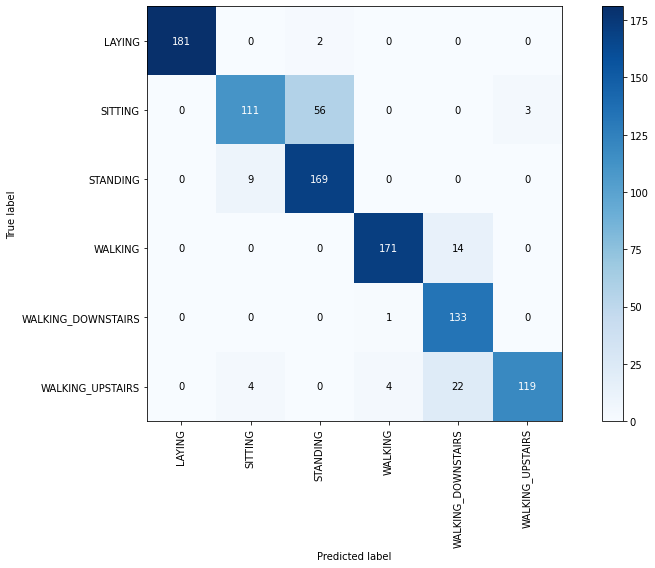

In [91]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred))  # plotting confusion matrix

In [92]:
#function to get best random search attributes
def get_best_randomsearch_results(model):
    print("Best estimator : ", model.best_estimator_)
    print("Best set of parameters : ", model.best_params_)
    #print("Best score : ", model.best_score_)

In [93]:
# getting best random search attributes
get_best_randomsearch_results(lr_classifier_rs)

Best estimator :  LogisticRegression(max_iter=500)
Best set of parameters :  {'max_iter': 500}


### 5.c Kernel SVM model with Hyperparameter tuning and cross validation

In [94]:
from sklearn.svm import SVC

In [95]:
np.linspace(2,22,6)

array([ 2.,  6., 10., 14., 18., 22.])

In [96]:
parameters = {
    'kernel': ['linear', 'rbf', 'poly','sigmoid'],
    'C': [100, 50, 20, 1, 0.1]
}

kernel_svm_rs = RandomizedSearchCV(SVC(),param_distributions=parameters,random_state = 42)
kernel_svm_rs.fit(X_train, y_train)


RandomizedSearchCV(estimator=SVC(),
                   param_distributions={'C': [100, 50, 20, 1, 0.1],
                                        'kernel': ['linear', 'rbf', 'poly',
                                                   'sigmoid']},
                   random_state=42)

In [97]:
kernel_svm_rs.best_params_

{'kernel': 'rbf', 'C': 100}

In [98]:
y_pred = kernel_svm_rs.predict(X_test)

In [99]:
kernel_svm_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Kernel SVM : ", kernel_svm_accuracy)

Accuracy using Kernel SVM :  0.8898898898898899


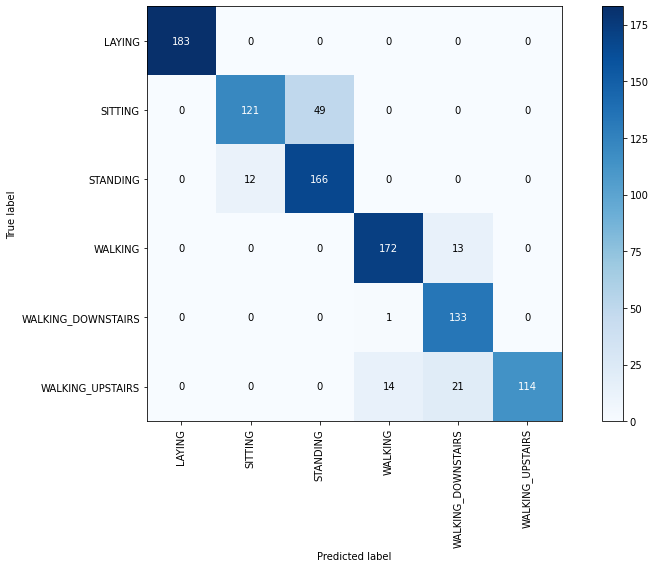

In [100]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [101]:
# getting best random search attributes
get_best_randomsearch_results(kernel_svm_rs)

Best estimator :  SVC(C=100)
Best set of parameters :  {'kernel': 'rbf', 'C': 100}


### 5.d Decision tree model with Hyperparameter tuning and cross validation

In [102]:
from sklearn.tree import DecisionTreeClassifier
parameters = {'max_depth':np.arange(2,10,2)}
dt_classifier = DecisionTreeClassifier()
dt_classifier_rs = RandomizedSearchCV(dt_classifier,param_distributions=parameters,random_state = 42)
dt_classifier_rs.fit(X_train, y_train)
y_pred = dt_classifier_rs.predict(X_test)

In [103]:
dt_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Decision tree : ", dt_accuracy)

Accuracy using Decision tree :  0.7827827827827828


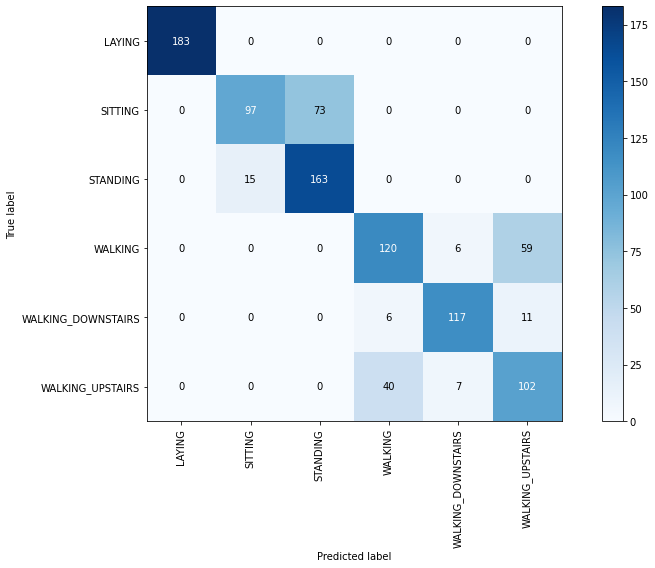

In [104]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [105]:
# getting best random search attributes
get_best_randomsearch_results(dt_classifier_rs)

Best estimator :  DecisionTreeClassifier(max_depth=4)
Best set of parameters :  {'max_depth': 4}


### 5.e Random forest model with Hyperparameter tuning and cross validation

In [110]:
from sklearn.ensemble import RandomForestClassifier
params = {'n_estimators': np.arange(20,101,10), 'max_depth':np.arange(2,17,2)}
rf_classifier = RandomForestClassifier()
rf_classifier_rs = RandomizedSearchCV(rf_classifier, param_distributions=params,random_state = 42)
rf_classifier_rs.fit(X_train, y_train)
y_pred = rf_classifier_rs.predict(X_test)

In [111]:
rf_accuracy = accuracy_score(y_true=y_test, y_pred=y_pred)
print("Accuracy using Random forest : ", rf_accuracy)

Accuracy using Random forest :  0.9069069069069069


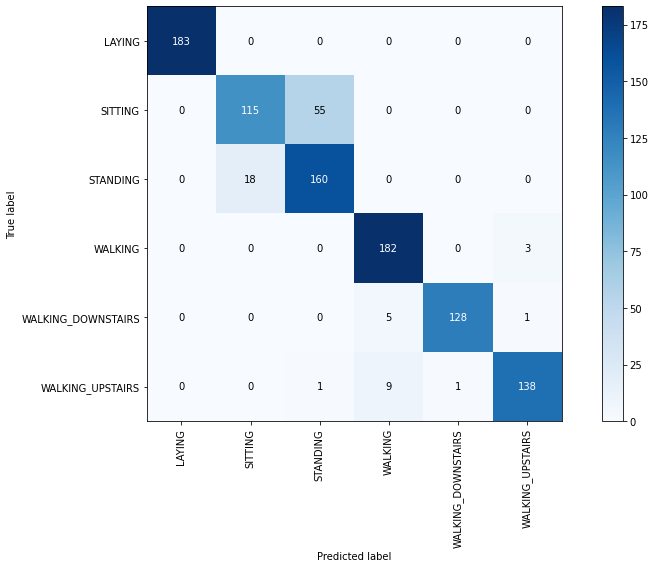

In [112]:
cm = confusion_matrix(y_test.values,y_pred)
plot_confusion_matrix(cm, np.unique(y_pred)) # plotting confusion matrix

In [113]:
# getting best random search attributes
get_best_randomsearch_results(rf_classifier_rs)

Best estimator :  RandomForestClassifier(max_depth=14)
Best set of parameters :  {'n_estimators': 100, 'max_depth': 14}
